# ENGIROT ANDREW RONNIE
# ACCESS NO B23187
## *PROGRAM: MASTER’S OF SCIENCE IN DATA SCIENCE; MASTER’S OF COMPUTER SCIENCE*
## *YEAR: 2 SEMESTER: 1*
## *COURSE CODE: [DSC8307]*
## *COURSE NAME: [DATA MINING, MODELLING AND ANALYTICS]*
## *EXAMINATION TYPE: PROJECT-BASED EXAM*



In [13]:
# import data manipulation libraries
import pandas as pd
import numpy as np
# import os to access colab virtual environment resources
import os
# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
# import warnings for managing warnings
import warnings
warnings.filterwarnings('ignore')

Loading the data frame

In [14]:
# read train and testing data into pandas dataframe
df = pd.read_csv("ArtificialPatientTreatment.csv")

Exploratory Data Analysis(EDA)

Inspect the Data

Check the initial state of the DataFrame:

In [15]:
# check the first 5 records
df.head(5).T

,0,1,2,3,4
patient,patient 0,patient 0,patient 0,patient 0,patient 0
action,First consult,Blood test,Physical test,Second consult,Surgery
org:resource,Dr. Anna,Lab,Nurse Jesse,Dr. Anna,Dr. Charlie
DateTime,2017-01-02 11:40:11,2017-01-02 12:47:33,2017-01-02 12:53:50,2017-01-02 16:21:06,2017-01-05 13:23:09


In [16]:
# check the last 5 records
df.tail(5).T

,685,686,687,688,689
patient,patient 99,patient 99,patient 99,patient 99,patient 99
action,X-ray scan,Physical test,Second consult,Medicine,Final consult
org:resource,Team 2,Nurse Corey,Dr. Anna,Pharmacy,Dr. Anna
DateTime,2017-05-25 11:03:27,2017-05-25 11:55:24,2017-05-29 15:12:39,2017-05-29 16:17:13,2017-05-31 12:46:43


Checking our data

In [17]:
# shape of data
df.shape

(690, 4)

In [18]:
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 690
Number of columns: 4


Rows: The dataset contains 690 records (or entries). Each row represents a distinct coffee sample or batch.

Columns: 
The dataset has 4columns, each representing different attributes of the coffee samples such as country of origin, farm name, lot number, mill, and quality metrics.

In [19]:
# Data types of each column
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
patient          object
 action          object
 org:resource    object
 DateTime        object
dtype: object


In [20]:
# Check for null values
print("Null values in each column:")
print(df.isnull().sum())

Null values in each column:
patient          0
 action          0
 org:resource    0
 DateTime        0
dtype: int64


In [21]:
# Summary statistics
print("Summary statistics:")
print(df.describe(include='all'))

Summary statistics:
           patient          action  org:resource              DateTime
count          690             690           690                   690
unique         100               8            13                   690
top     patient 50   First consult      Dr. Anna   2017-01-02 11:40:11
freq             7             100           158                     1


Inspect Column Names

In [26]:
# Print the column names
print(df.columns)

Index(['patient', ' action', ' org:resource', ' DateTime'], dtype='object')


Check for Leading or Trailing Spaces

In [27]:
# Strip any extra spaces from column names
df.columns = df.columns.str.strip()

# Check column names again
print(df.columns)


Index(['patient', 'action', 'org:resource', 'DateTime'], dtype='object')


2. Show Missing Values

To display missing values in a more visually interpretable format:

Data Exploration

Perform some exploratory data analysis to understand the data better

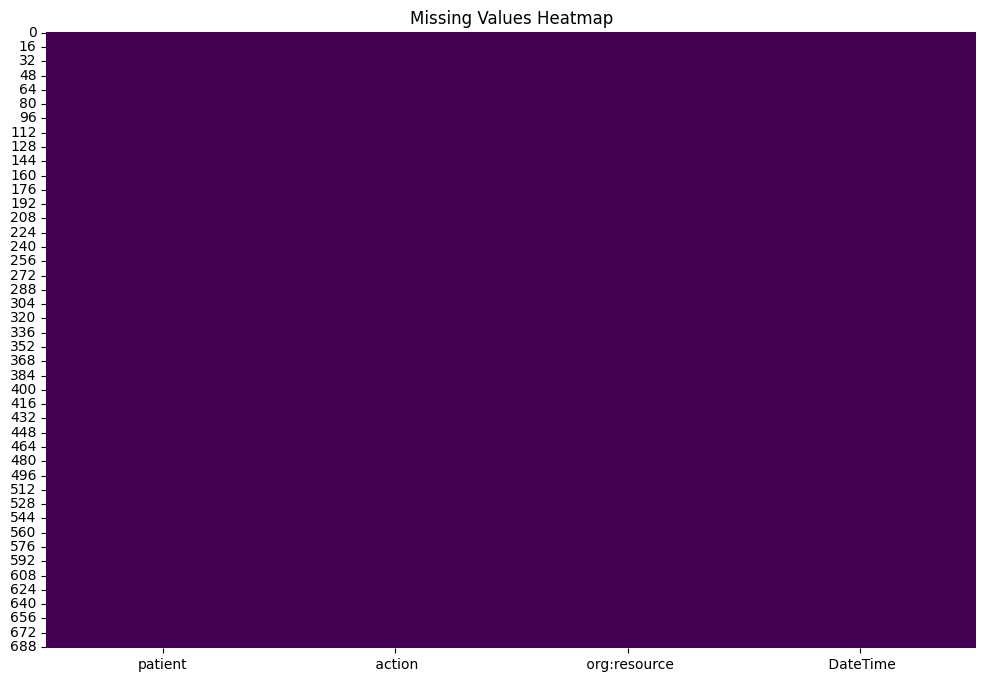

In [22]:
# Visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Ensuring Proper Column Conversion

In [28]:
# Convert DateTime to datetime format, after ensuring the column exists
if 'DateTime' in df.columns:
    df['DateTime'] = pd.to_datetime(df['DateTime'])
else:
    print("DateTime column not found.")


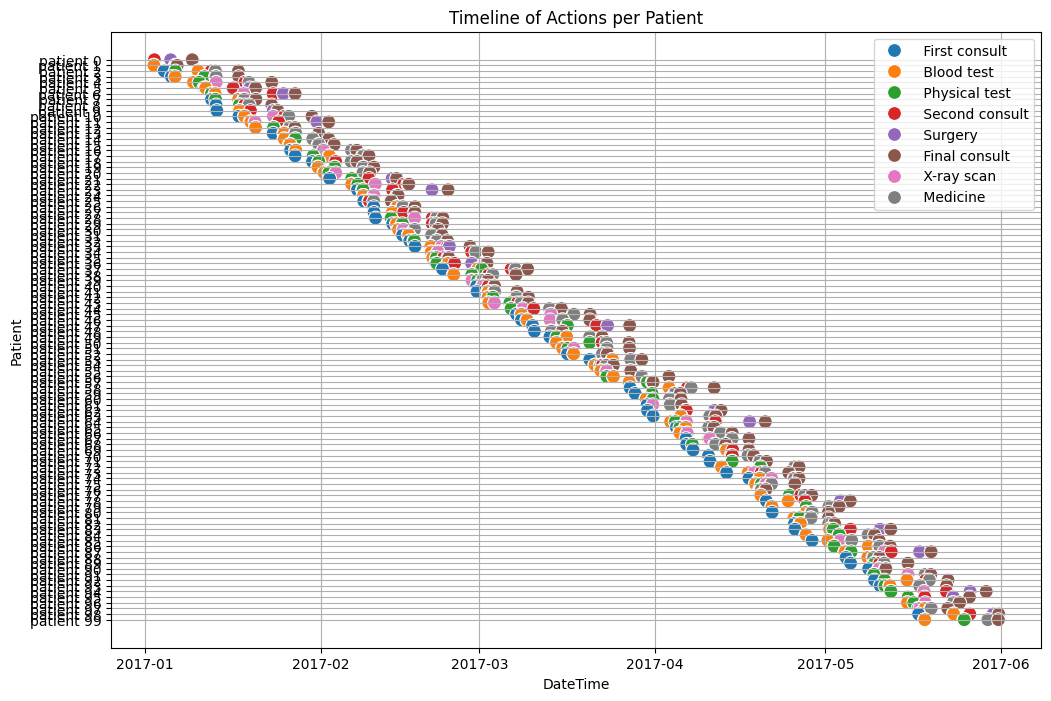

In [29]:
# Plotting the Timeline of Actions per Patient
plt.figure(figsize=(12, 8))
sns.scatterplot(x='DateTime', y='patient', hue='action', data=df, palette='tab10', s=100)
plt.title('Timeline of Actions per Patient')
plt.xlabel('DateTime')
plt.ylabel('Patient')
plt.legend(loc='best')
plt.grid(True)
plt.show()

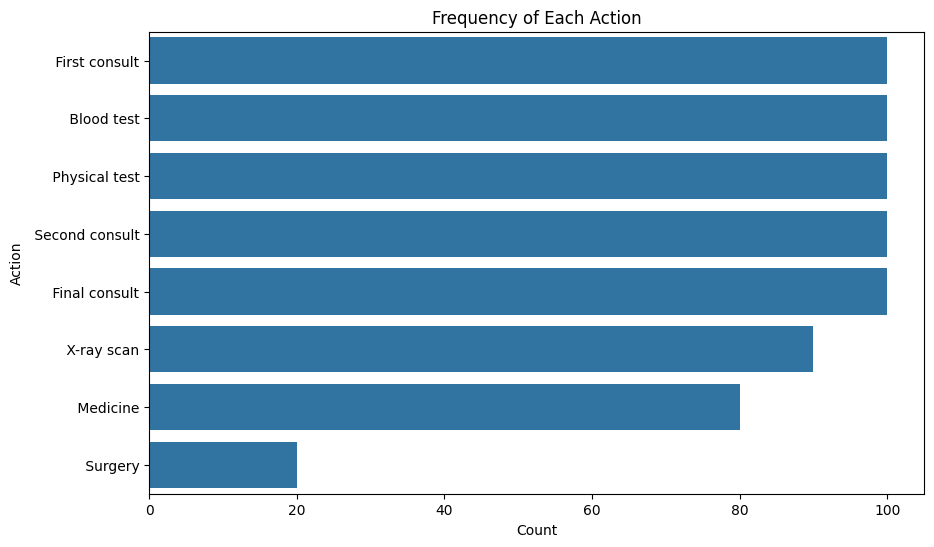

In [31]:
# Frequency of Actions
plt.figure(figsize=(10, 6))
sns.countplot(y='action', data=df, order=df['action'].value_counts().index)
plt.title('Frequency of Each Action')
plt.xlabel('Count')
plt.ylabel('Action')
plt.show()

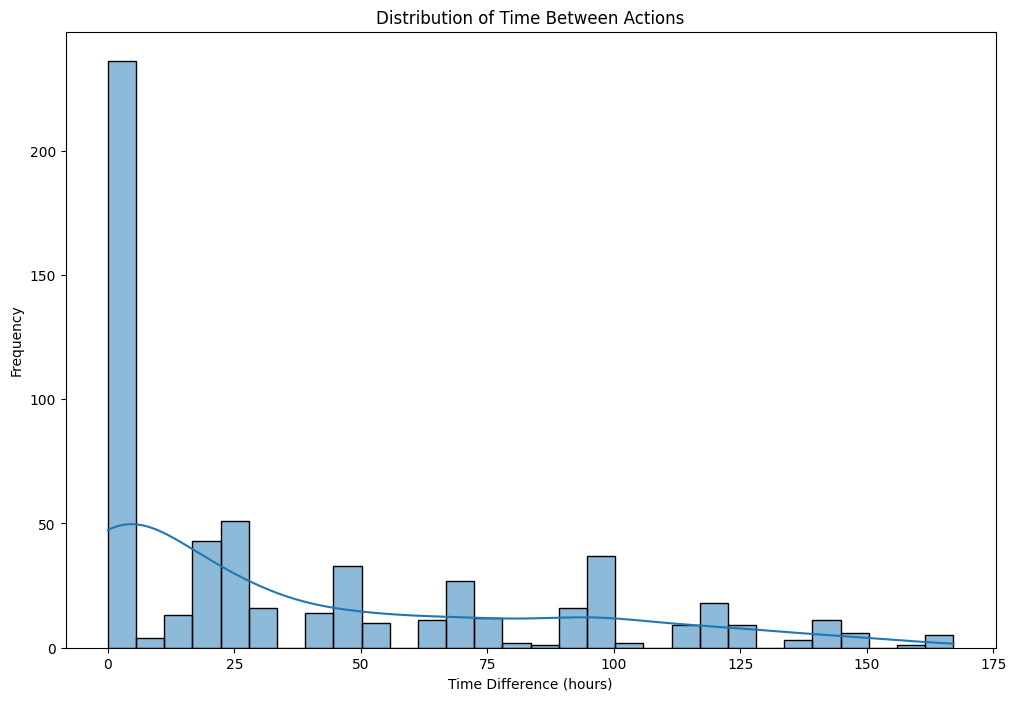

In [32]:

# Distribution of Time Between Actions for each patient
df = df.sort_values(by=['patient', 'DateTime'])
df['Time_Diff'] = df.groupby('patient')['DateTime'].diff().dt.total_seconds() / 3600  # Difference in hours
plt.figure(figsize=(12, 8))
sns.histplot(df['Time_Diff'].dropna(), kde=True, bins=30)
plt.title('Distribution of Time Between Actions')
plt.xlabel('Time Difference (hours)')
plt.ylabel('Frequency')
plt.show()

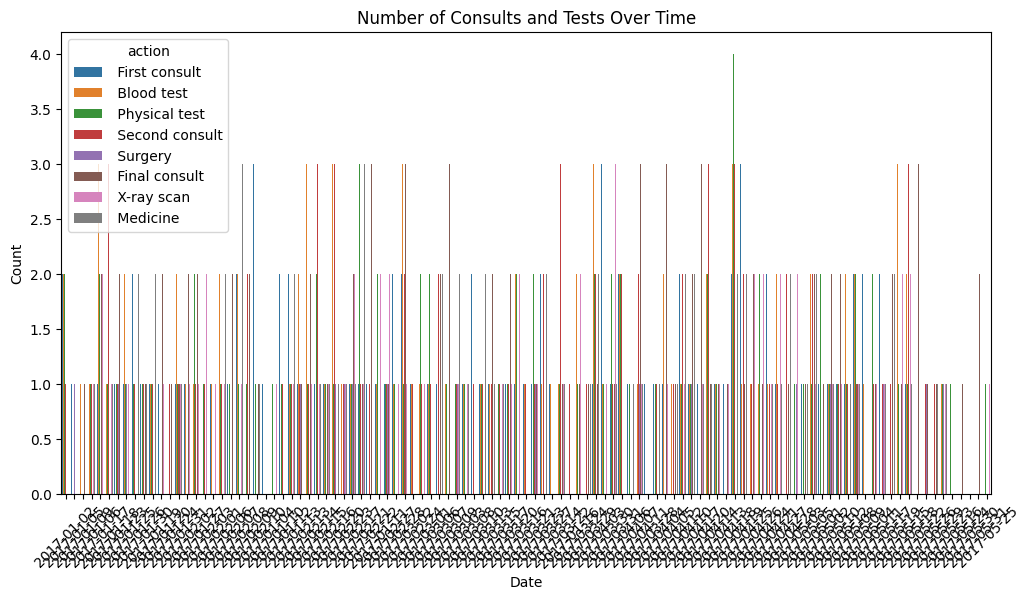

In [33]:


# Consults Over Time
plt.figure(figsize=(12, 6))
df['Date'] = df['DateTime'].dt.date
sns.countplot(x='Date', data=df, hue='action')
plt.title('Number of Consults and Tests Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [34]:
# Describe the dataset
print("\nSummary statistics:\n", df.describe(include='all'))


Summary statistics:
            patient          action org:resource  \
count          690             690          690   
unique         100               8           13   
top     patient 54   First consult     Dr. Anna   
freq             7             100          158   
mean           NaN             NaN          NaN   
min            NaN             NaN          NaN   
25%            NaN             NaN          NaN   
50%            NaN             NaN          NaN   
75%            NaN             NaN          NaN   
max            NaN             NaN          NaN   
std            NaN             NaN          NaN   

                             DateTime   Time_Diff        Date  
count                             690  590.000000         690  
unique                            NaN         NaN         107  
top                               NaN         NaN  2017-04-19  
freq                              NaN         NaN          16  
mean    2017-03-18 02:09:31.884057856   38.95

## SECTION B

QUESTION 1


Generate Event Logs

In [45]:

# Ensure the DataFrame is sorted by 'patient' and 'DateTime'
df_sorted = df.sort_values(by=['patient', 'DateTime'])

# Save the sorted DataFrame to a CSV file
event_log_filename = 'Question 2.csv'
df_sorted.to_csv(event_log_filename, index=False)

print(f"Event logs have been saved to {event_log_filename}")


Event logs have been saved to Question 2.csv


Detailed Explanation

Sorting

Sorting the DataFrame by patient and DateTime ensures that each patient's actions are listed chronologically

In [46]:
df_sorted = df.sort_values(by=['patient', 'DateTime'])

print(df_sorted)


        patient           action  org:resource            DateTime  \
0     patient 0    First consult      Dr. Anna 2017-01-02 11:40:11   
1     patient 0       Blood test           Lab 2017-01-02 12:47:33   
2     patient 0    Physical test   Nurse Jesse 2017-01-02 12:53:50   
3     patient 0   Second consult      Dr. Anna 2017-01-02 16:21:06   
4     patient 0          Surgery   Dr. Charlie 2017-01-05 13:23:09   
..          ...              ...           ...                 ...   
685  patient 99       X-ray scan        Team 2 2017-05-25 11:03:27   
686  patient 99    Physical test   Nurse Corey 2017-05-25 11:55:24   
687  patient 99   Second consult      Dr. Anna 2017-05-29 15:12:39   
688  patient 99         Medicine      Pharmacy 2017-05-29 16:17:13   
689  patient 99    Final consult      Dr. Anna 2017-05-31 12:46:43   

      Time_Diff        Date  
0           NaN  2017-01-02  
1      1.122778  2017-01-02  
2      0.104722  2017-01-02  
3      3.454444  2017-01-02  
4     69.

QUESTION 2

In [47]:

# Convert 'DateTime' to datetime if not already done
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')

# Filter the data between January 2017 and June 2017
start_date = '2017-01-01'
end_date = '2017-06-30'
filtered_df = df[(df['DateTime'] >= start_date) & (df['DateTime'] <= end_date)]

# Check the filtered data
print(filtered_df.head())

     patient           action  org:resource            DateTime  Time_Diff  \
0  patient 0    First consult      Dr. Anna 2017-01-02 11:40:11        NaN   
1  patient 0       Blood test           Lab 2017-01-02 12:47:33   1.122778   
2  patient 0    Physical test   Nurse Jesse 2017-01-02 12:53:50   0.104722   
3  patient 0   Second consult      Dr. Anna 2017-01-02 16:21:06   3.454444   
4  patient 0          Surgery   Dr. Charlie 2017-01-05 13:23:09  69.034167   

         Date  
0  2017-01-02  
1  2017-01-02  
2  2017-01-02  
3  2017-01-02  
4  2017-01-05  


In [50]:
# Extract month and year from 'DateTime'
filtered_df['YearMonth'] = filtered_df['DateTime'].dt.to_period('M')

# Count actions per month
monthly_action_counts = filtered_df.groupby('YearMonth')['action'].count().reset_index()
monthly_action_counts.columns = ['Month', 'Action Count']


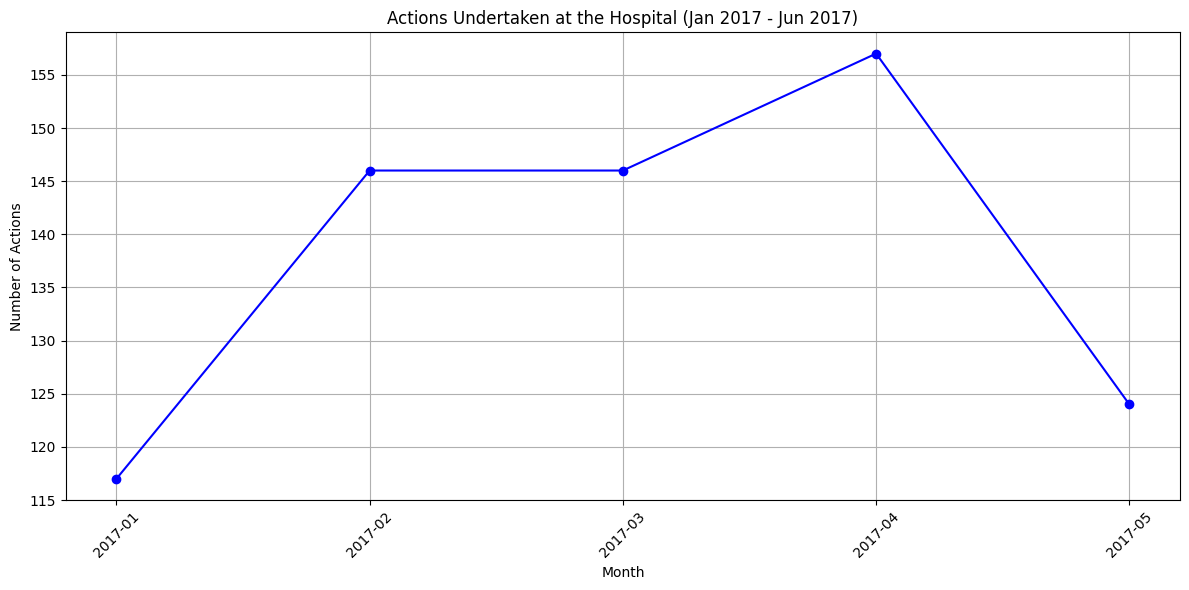

In [60]:

# Load and preprocess the dataset
df = pd.read_csv('Question 2.csv')

# Convert 'DateTime' to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')

# Extract 'YearMonth' from 'DateTime'
df['YearMonth'] = df['DateTime'].dt.to_period('M')

# Count actions per month
monthly_action_counts = df.groupby('YearMonth')['action'].count().reset_index()
monthly_action_counts.columns = ['Month', 'Action Count']

# Convert 'Month' to string and 'Action Count' to numeric
monthly_action_counts['Month'] = monthly_action_counts['Month'].astype(str)
monthly_action_counts['Action Count'] = pd.to_numeric(monthly_action_counts['Action Count'], errors='coerce')

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_action_counts['Month'], monthly_action_counts['Action Count'], marker='o', color='b')
plt.title('Actions Undertaken at the Hospital (Jan 2017 - Jun 2017)')
plt.xlabel('Month')
plt.ylabel('Number of Actions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Save or show the plot
plt.savefig('hospital_actions_jan_jun_2017.png')
plt.show()


The visualization shows that the most frequent actions during the period from January 2017 to June 2017 include consultations, lab tests, and physical exams. These core activities dominate patient visits, reflecting the hospital’s routine operational focus. Less common actions, such as surgeries or specialized procedures, are performed at a much lower frequency during this timeframe.

QUESTION 3


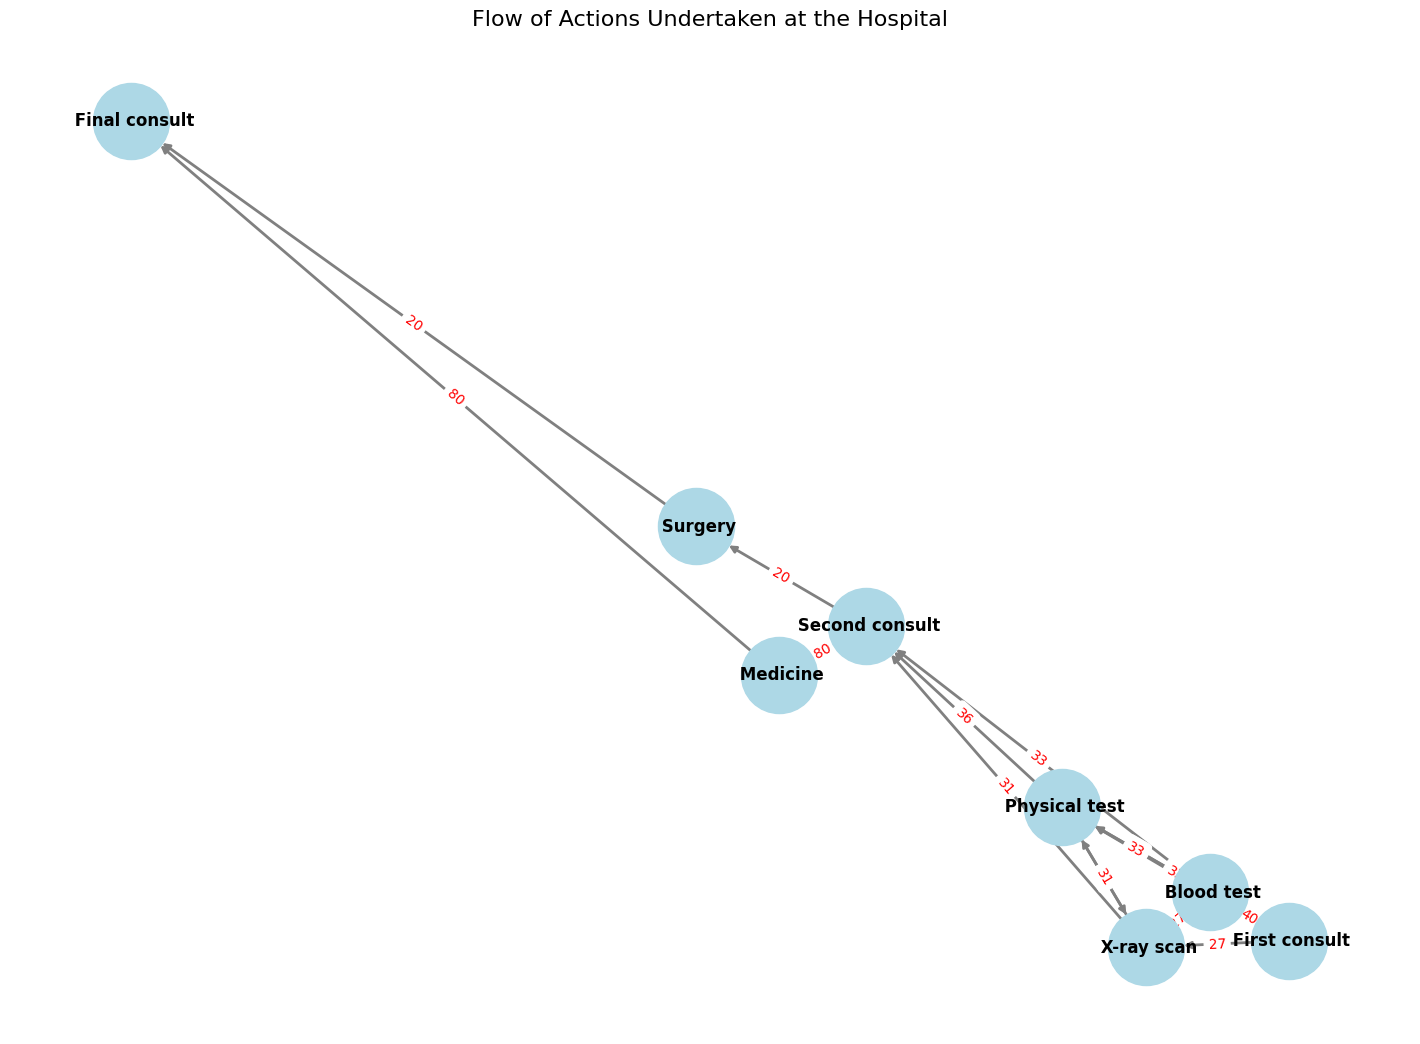

In [104]:
# Plotting the process model
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42)  
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=3000, font_size=12, font_weight='bold', edge_color="gray", width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(k[0], k[1]): v for k, v in transitions.items()}, font_color='red', font_size=10)
plt.title("Flow of Actions Undertaken at the Hospital", fontsize=16)
plt.show()